In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merged_data_removed_cols.csv')

In [3]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,acousticness
0,622652,Five For Fighting,Easy Tonight,57PHqrPsX6E7OX9LeKSo9Q,37,2000,acoustic,0.470,0.2590
1,622653,Stephen Speaks,Passenger Seat,67E65R1XMIKCzRrJ3pC5IS,54,2000,acoustic,0.550,0.0237
2,622654,Chris Smither,No Love Today,6KmJfZCd5f4P11vuglbIrN,34,2000,acoustic,0.557,0.8490
3,622655,Chris Smither,Link Of Chain,16N2lpCidTNYdNq2YZhE98,35,2000,acoustic,0.445,0.8830
4,622656,Bob Schneider,Big Blue Sea,4maIlg3dss7yA23mBdTYdM,27,2000,acoustic,0.671,0.5540


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1048575 non-null  int64  
 1   artist_name   1048560 non-null  object 
 2   track_name    1048542 non-null  object 
 3   track_id      1048575 non-null  object 
 4   popularity    1048575 non-null  int64  
 5   year          1048575 non-null  int64  
 6   genre         1048575 non-null  object 
 7   danceability  1048575 non-null  float64
 8   acousticness  1048575 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 72.0+ MB


In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns
df.isnull().sum()

artist_name     15
track_name      33
track_id         0
popularity       0
year             0
genre            0
danceability     0
acousticness     0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

artist_name     0
track_name      0
track_id        0
popularity      0
year            0
genre           0
danceability    0
acousticness    0
dtype: int64

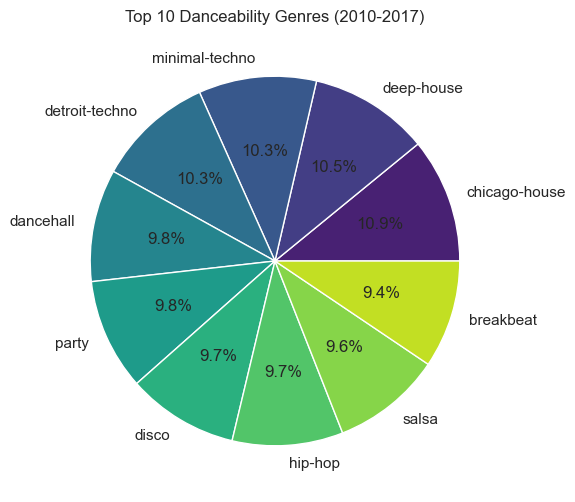

In [6]:
# Lọc dữ liệu từ năm 2010 đến 2017
df_filtered = df[(df['year'] >= 2010) & (df['year'] <= 2017)]

# Tạo DataFrame mới với dữ liệu được lọc
danceability_across_genres_avg_filtered = danceability_across_genres_avg_filtered.sort_values(by="danceability", ascending=False)

# Chọn top 10
danceability_across_genres_avg_top10_filtered = danceability_across_genres_avg_filtered.head(10)

# Vẽ biểu đồ hình tròn với màu sắc đa dạng
plt.figure(figsize=(10, 6))
plt.pie(danceability_across_genres_avg_top10_filtered['danceability'], labels=danceability_across_genres_avg_top10_filtered['genre'], autopct='%1.1f%%', colors=sns.color_palette("viridis", n_colors=len(danceability_across_genres_avg_top10_filtered)))
plt.title('Top 10 Danceability Genres (2010-2017)')

plt.show()

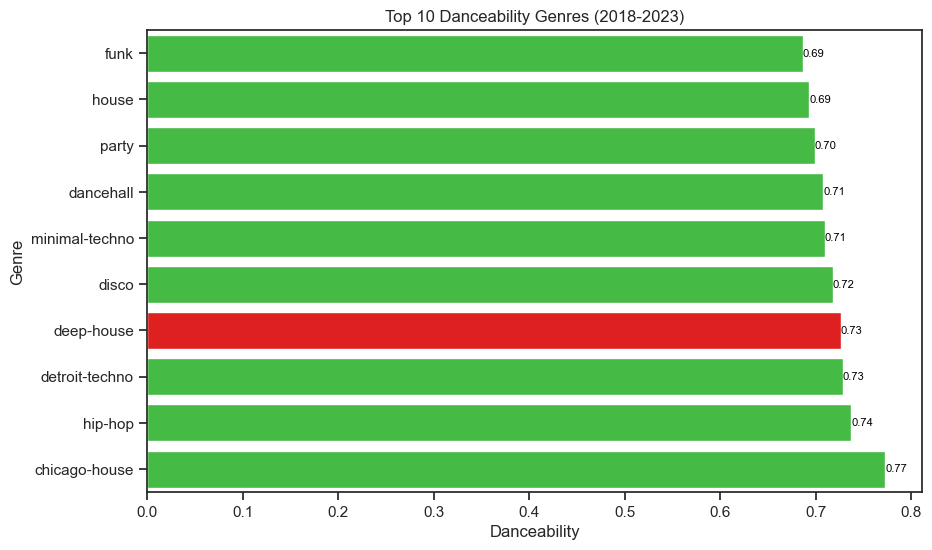

In [14]:

df_filtered = df[(df['year'] >= 2018) & (df['year'] <= 2023)]

# Tạo DataFrame mới với dữ liệu được lọc
danceability_across_genres_filtered = df_filtered[['genre', 'track_name', 'danceability']]

# Tính giá trị trung bình danceability theo thể loại
danceability_across_genres_avg_filtered = danceability_across_genres_filtered.groupby('genre')['danceability'].mean().reset_index()

# Sắp xếp theo danceability tăng dần
danceability_across_genres_avg_filtered = danceability_across_genres_avg_filtered.sort_values(by="danceability", ascending=True)

# Chọn top 10
danceability_across_genres_avg_top10_filtered = danceability_across_genres_avg_filtered[-10:]

# Vẽ biểu đồ
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor':'white'})

barplot_top10 = sns.barplot(x='danceability', y='genre', data=danceability_across_genres_avg_top10_filtered, color="limegreen")
sns.barplot(x='danceability', y='genre', 
            data=danceability_across_genres_avg_top10_filtered[danceability_across_genres_avg_top10_filtered['genre'] == 'deep-house'], color="red")
plt.title('Top 10 Danceability Genres (2018-2023)')
plt.xlabel('Danceability')
plt.ylabel('Genre')

# Thêm chú thích vào top 10 genres
for index, value in enumerate(danceability_across_genres_avg_top10_filtered['danceability']):
    barplot_top10.text(value, index, f'{value:.2f}', ha='left', va='center', color="black", fontsize=8)



plt.show()